# 2. 멋진 단어장 만들기


https://nbviewer.org/github/eunji1/NLP/blob/main/NLP%5B2%5D_spm.ipynb


In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   523k      0  0:00:02  0:00:02 --:--:-- 1049k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
train_data = pd.read_table('/gdrive/MyDrive/Colab Notebooks/Going_Deeper(NLP)/Node.02/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('/gdrive/MyDrive/Colab Notebooks/Going_Deeper(NLP)/Node.02/sp_tokenizer/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


데이터 정제


In [ ]:
# drop_duplicates, 중복 데이터 처리
# dropna(how = 'any'), 해당 행에 nan값이 한개라도 있을 때 제거해준다.  

train_data.drop_duplicates(subset=['document'], inplace=True) #subset은 중복데이터를 처리할 열을 입력받는다.
train_data = train_data.dropna(how = 'any') 

test_data.drop_duplicates(subset=['document'], inplace=True)
test_data = test_data.dropna(how = 'any') 

In [ ]:
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(train_data), len(test_data)))

훈련 샘플 개수: 146182, 테스트 개수: 49157


In [ ]:
import re

# 데이터 전처리 함수

re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",str(train_data['document'])) 


re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",str(test_data['document'])) 




'                                                      굳 ㅋ                                                        뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아                         지루하지는 않은데 완전 막장임 돈주고 보기에는        만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠                                                                   오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함         의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따                    그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다       절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네                                           마무리는 또 왜이래     '

In [ ]:
print(len(train_data))
print(len(test_data))

146182
49157


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


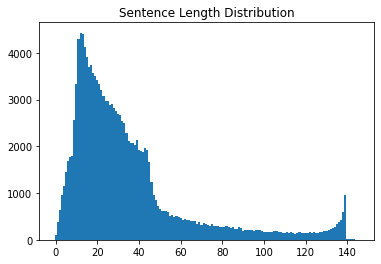

In [ ]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_data))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


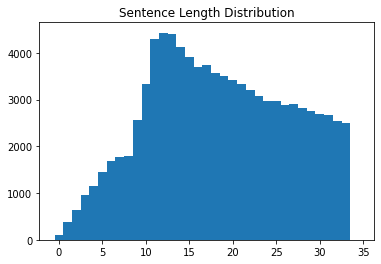

In [ ]:
max_len = 35

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in train_data['document'] if (len(s) < max_len)]
#테스트 데이터도
filtered_corpus_t = [s for s in test_data['document'] if (len(s) < max_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

2-3. 공백 기반 토큰화

In [ ]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.0
1.21.5
3.2.2
0.6.0


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 4.3 MB/s 


In [ ]:
import sentencepiece as spm

vocab_size = 32000
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','.'] #.추가


def load_data(train_data, test_data, num_words=32000):
    #데이터 전처리  중복제거 -> 결측치 제거 (train , test )
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 정규표현식 적용 (한글, 공백, !, ? 제외 제거)
    train_data['document'] = train_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')
    test_data['document'] = test_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')

    # 공백, !, ? 기호가 반복될 경우 한 개로 축약
    train_data['document'] = train_data['document'].str.replace(' +', ' ')
    test_data['document'] = test_data['document'].str.replace(' +', ' ')
    
    train_data['document'] = train_data['document'].str.replace('\?+', '?')
    test_data['document'] = test_data['document'].str.replace('\?+', '?')

    train_data['document'] = train_data['document'].str.replace('!+', '!')
    test_data['document'] = test_data['document'].str.replace('!+', '!')

    y_train =  np.array(list(train_data['label'])) 
    y_test = np.array(list(test_data['label']))
    
    return train_data['document'], test_data['document'], y_train, y_test

train_data, test_data, y_train, y_test = load_data(train_data, test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to Fals

In [ ]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [ ]:
import sentencepiece as spm
import os
#temp_file = ('/gdrive/My Drive/Colab Notebooks/Going Deeper(NLP)/Node.02/sp_tokenizer/data/korean-english-park.train.ko.temp')
temp_file = ('/gdrive/MyDrive/data/korean-english-park.train.ko.temp')
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')
    
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 375949 Mar 24 10:25 korean_spm.model
-rw-r--r-- 1 root root 145415 Mar 24 10:25 korean_spm.vocab


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds(row)
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces(row,1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[268, 6, 3251, 31, 76, 392, 86, 458, 4942, 6]
['▁한국', '▁영화', '▁최초', '로', '▁수', '간', '하는', '▁내용이', '▁담긴', '▁영화']
한국 영화 최초로 수간하는 내용이 담긴 영화


In [ ]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [ ]:
X_train, index_word_train, index_word_train = sp_tokenize(s, train_data)

In [ ]:
X_test, index_word_test, index_word_test = sp_tokenize(s, test_data)

In [ ]:
y_train[:5]

array([0, 1, 0, 0, 1])

In [ ]:
y_test[:5]

array([1, 0, 0, 0, 0])

In [ ]:
train_data[:5]

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [ ]:
my_corpus = train_data[:5]
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   42  910
    27 1991   70 2526]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 1151 4712  186 1143   29  253  160  551  397
  1504 6135  451  324]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   22  464 7427  328 5314
   634 2376 1384  315]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 2076   12  203  162 3907  339
   897   90  614 5879]
 [3260 3319 1807  224    9    3 2141  418 2750  519 2949  120 2479    6
    18 6349   61 6982 1632 1170 3280 2034   62 1949    3  142  785   10
  2410 3611  120  700]]


In [ ]:
print(len(X_train))
print(len(X_test))

146182
49157


In [ ]:
X_val = X_train[:50000]
X_train = X_train[50000:]

y_val = y_train[:50000]
y_train = y_train[50000:]

In [ ]:
print(len(X_val), len(X_train))

50000 96182


모델 학습하기

In [ ]:
vocab_size = 50000 
word_vector_dim = 16 # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

In [ ]:
# LSTM
model = tf.keras.Sequential(name='LSTM')
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()
#단어하나마다 연속성이 없어서 none을 쓴다.


Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          800000    
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 800,881
Trainable params: 800,881
Non-trainable params: 0
_________________________________________________________________


모델훈련 개시

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
752/752 [==============================] - 12s 12ms/step - loss: 0.4448 - accuracy: 0.7953 - val_loss: 0.3601 - val_accuracy: 0.8437
Epoch 2/10
752/752 [==============================] - 8s 11ms/step - loss: 0.3371 - accuracy: 0.8564 - val_loss: 0.3535 - val_accuracy: 0.8454
Epoch 3/10
752/752 [==============================] - 8s 11ms/step - loss: 0.3119 - accuracy: 0.8677 - val_loss: 0.3504 - val_accuracy: 0.8476
Epoch 4/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2889 - accuracy: 0.8771 - val_loss: 0.3503 - val_accuracy: 0.8483
Epoch 5/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2675 - accuracy: 0.8875 - val_loss: 0.3590 - val_accuracy: 0.8460
Epoch 6/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2474 - accuracy: 0.8955 - val_loss: 0.3742 - val_accuracy: 0.8439
Epoch 7/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2300 - accuracy: 0.9036 - val_loss: 0.3897 - val_accuracy: 0.842

그래프 시각화

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


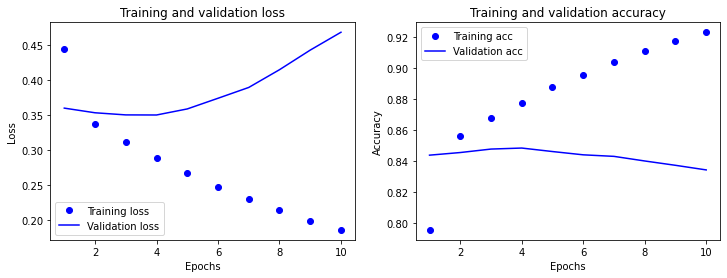

In [ ]:
# LSTM 그래프

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"는 "파란색 점"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b는 "파란 실선"입니다
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|상세기준|
|:---|:---|
|1. SentencePiece를 이용하여 모델을 만들기까지의 과정이 정상적으로 진행되었는가?|코퍼스 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작이 빠짐없이 진행되었는가?|
|2. SentencePiece를 통해 만든 Tokenizer가 자연어처리 모델과 결합하여 동작하는가?|SentencePiece 토크나이저가 적용된 Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy가 확인되었다.|
|3. SentencePiece의 성능을 다각도로 비교분석하였는가?|SentencePiece 토크나이저를 활용했을 때의 성능을 다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석을 체계적으로 진행하였다.|



고잉디퍼 엔엘피 첫 프로젝트는 너무 어려워서 오랜시간을 보았었다. 코드를 내맘대로 변형해서 쓰려다보니 실력이 너무나 부족하고 쉬운게 없단 것을 느꼈다.ㅠㅠㅠ 공부를 더 열심히 해야겠다.

문제요인
1. 코랩으로 txt파일을 불러올때 항상 잘되던게 오류가 났다. 이것은 드라이브 불러오는 경로가 ```/My Drive/Colab Notebooks``` 이와같이 파일명에 공백 처리가 되어있을 경우 에러가 나는 것 같다.
2. 모델 학습하기 위해서 x_train과 y_train 배열을 맞춰야하지만 내가 찾은 코드로는 전혀 되지 않았다. 동섭님 코드를 보고 맞춰서 했다.😄

새롭게 알게된 사실
- 패딩을 할 때 'pre', 'post' 둘 중 하나를 사용하는데, pre는 앞에서부터 0을 채우는 것, post는 뒤에서부터 0을 채우는 것이다.
- post로 했을 때는 정확도가 0.5로 나왔던 반면에 pre로 했을 때는 0.9 높게 나왔다. post보다는 pre가 정확도가 높게 나온다.(이것도 동섭님이 알려셨다.)
- 한국어는 어순 상 영어와 달라서 pre가 더 잘나오는게 아닌가싶다.